<a href="https://colab.research.google.com/github/AnkitNigam1985/Data-Science-Projects/blob/master/Movie_and_Book_Recommendation_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building a Movie Content Based Recommendation System**

Dataset - 
https://www.kaggle.com/tmdb/tmdb-movie-metadata

![picture] (https://drive.google.com/file/d/1FFeg_M4PmfqtA-cz8MAt0p130ZbQLoF1/view?usp=sharing)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#from google.colab import files

#uploaded=files.upload()

#for fn in uploaded.keys():
 # print ("Uploaded - ", fn)

In [ ]:
credits_data=pd.read_csv("/content/drive/My Drive/tmdb_5000_credits.csv")

In [ ]:
credits_data.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
#from google.colab import files

#uploaded=files.upload()

#for fn in uploaded.keys():
 # print ("Uploaded - ", fn)

In [ ]:
movies_data=pd.read_csv("/content/drive/My Drive/tmdb_5000_movies.csv")

In [ ]:
movies_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
credits_data.shape

(4803, 4)

In [ ]:
credits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
movies_data.shape

(4803, 20)

Merging both credits and movies data set

In [ ]:
merged_data=pd.merge(movies_data, credits_data, left_on='id', right_on='movie_id')
merged_data=merged_data.drop('movie_id', axis=1)
merged_data.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


Dropping columns which are not required

In [ ]:
merged_data=merged_data.drop(['budget','homepage', 'production_companies','production_countries','runtime','status','title_x','title_y','crew','cast','tagline'], axis=1)
merged_data.head(2)

,genres,id,keywords,original_language,original_title,overview,popularity,release_date,revenue,spoken_languages,vote_average,vote_count
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500


**Using TF-IDF vectorizer on overview field**

In [ ]:
merged_data.head(5)[['original_title','overview']]

,original_title,overview
0,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,Spectre,A cryptic message from Bond’s past sends him o...
3,The Dark Knight Rises,Following the death of District Attorney Harve...
4,John Carter,"John Carter is a war-weary, former military ca..."


https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
#Getting object for TF-IDF Vecor class with ngram_range =1,3 so that word combinations from 1 word to 3 words can be used in learning.
#stop words used to remove generic stop words like 'is, are..'
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

In [ ]:
#removing all NaN values from overview before feeding it to TF-IDF
merged_data['overview']=merged_data['overview'].fillna("")

In [ ]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(merged_data['overview'])

In [ ]:
tfv_matrix

<4803x10417 sparse matrix of type '<class 'numpy.float64'>'
	with 127220 stored elements in Compressed Sparse Row format>

In [ ]:
tfv_matrix.shape

(4803, 10417)

In [ ]:
tfv_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise



We will be analyzing 2 ways - sigmoid kernel and cosine similarity to find the similarity in movies based on overview

It takes tvf_matrix as input - both the arguments as it creates matrix where each movie would be compared with all the other movies

So, mxm matrix

the output array contains the similarity value.

Each row for a movie and columns for each movie

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity
cosine = cosine_similarity(tfv_matrix, tfv_matrix)

In [ ]:
cosine[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [ ]:
sig[0]

array([0.76163447, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [ ]:
# Reverse mapping of indices and movie titles
# movie_title as index and  movie_id as value as it would be used to get movie id later in the function based on movie title
indices = pd.Series(merged_data.index, index=merged_data['original_title']).drop_duplicates()

In [ ]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [ ]:
indices['John Carter']

4

In [ ]:
cosine[indices['John Carter']]

array([0.        , 0.04041105, 0.00658302, ..., 0.01182898, 0.        ,
       0.01855202])

In [ ]:
sig[indices['John Carter']]

array([0.76159416, 0.76159579, 0.76159442, ..., 0.76159463, 0.76159416,
       0.7615949 ])

In [ ]:
#Using enumerate as we need to attach id with every value in similariy matrix from sigmoid kernel
list(enumerate(sig[indices['John Carter']]))[0:11]

[(0, 0.7615941559557649),
 (1, 0.7615957851727588),
 (2, 0.7615944213582981),
 (3, 0.7615950457737669),
 (4, 0.7616344692549826),
 (5, 0.7615943590937618),
 (6, 0.761595355335781),
 (7, 0.7615961583389188),
 (8, 0.761594434644127),
 (9, 0.7615955376945788),
 (10, 0.7615950187584507)]

In [ ]:
#Using enumerate as we need to attach id with every value in similariy matrix from cosine similarity
list(enumerate(cosine[indices['John Carter']]))[0:11]

[(0, 0.0),
 (1, 0.04041104869093043),
 (2, 0.006583020070713267),
 (3, 0.022070989024338863),
 (4, 1.0000000000000002),
 (5, 0.0050386156576234685),
 (6, 0.029749362194991445),
 (7, 0.049667084365567),
 (8, 0.006912560714122521),
 (9, 0.03427259206982752),
 (10, 0.021400901791795227)]

In [ ]:
#This function takes title and cosine/sigmoid array and returns top movies related to it
def give_rec(title, sig):
    # Get the index corresponding to original_title from series created above(movie_name - index, movie_id - value)
    idx = indices[title]

    # Get the pairwsie similarity scores for the given movie index
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies on sigscore[:, 1]  - as second field is score, while first is index
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return merged_data['original_title'].iloc[movie_indices]

**Recommendation for Avatar based on Sigmoid kernel**

In [ ]:
give_rec('Avatar', sig)

1341                Obitaemyy Ostrov
634                       The Matrix
3604                       Apollo 18
2130                    The American
775                        Supernova
529                 Tears of the Sun
151                          Beowulf
311     The Adventures of Pluto Nash
847                         Semi-Pro
942                 The Book of Life
Name: original_title, dtype: object

**Recommendation for Avatar based on Cosine function**

In [ ]:
give_rec('Avatar', cosine)

1341                Obitaemyy Ostrov
634                       The Matrix
3604                       Apollo 18
2130                    The American
775                        Supernova
529                 Tears of the Sun
151                          Beowulf
311     The Adventures of Pluto Nash
847                         Semi-Pro
942                 The Book of Life
Name: original_title, dtype: object

**Both cosine similarity and signoid kernel output same recommendation**

# **Building a content based Movie Recommendation System based on weighted average**

**W=(R*V+C*M)/(V+M)**


**W -> weighted rating**

**R -> vote_average for the movie**

**V -> number of votes**

**M -> minimum votes required to be in top 7%**

**C -> mean vote across the whole report**

In [ ]:
merged_data1=pd.merge(movies_data, credits_data, left_on='id', right_on='movie_id')
merged_data1=merged_data1.drop('movie_id', axis=1)
merged_data1=merged_data1.drop(['budget','homepage', 'production_companies','production_countries','runtime','status','title_x','title_y','crew','cast','tagline','genres','keywords','release_date','spoken_languages','revenue'], axis=1)
merged_data1.head(2)

,id,original_language,original_title,overview,popularity,vote_average,vote_count
0,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800
1,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500


In [ ]:
# Calculate all the components based on the above formula
v=merged_data1['vote_count']
R=merged_data1['vote_average']
C=merged_data1['vote_average'].mean()
m=merged_data1['vote_count'].quantile(0.70)

merged_data1['weighted_average']=((R*v)+ (C*m))/(v+m)

In [ ]:
merged_data1.head()

,id,original_language,original_title,overview,popularity,vote_average,vote_count,weighted_average
0,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,7.148013
1,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500,6.807627
2,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,6.3,4466,6.276075
3,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,7.6,9106,7.509565
4,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,6.1,2124,6.098319


In [ ]:
merged_data1_ranking=merged_data1.sort_values('weighted_average',ascending=False)
merged_data1_ranking.head()

,id,original_language,original_title,overview,popularity,vote_average,vote_count,weighted_average
1881,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,8.5,8205,8.340775
3337,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,8.4,5893,8.192887
662,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,8.3,9413,8.171648
3232,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,8.3,8428,8.157615
65,155,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,8.2,12002,8.102674


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


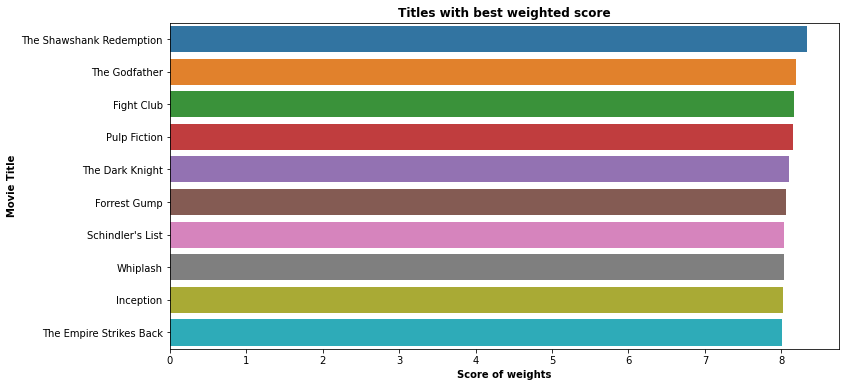

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='weighted_average', y='original_title', data=merged_data1_ranking.head(10))
plt.title("Titles with best weighted score", weight='bold')
plt.xlabel('Score of weights', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.show()

Text(0, 0.5, 'Movie Title')

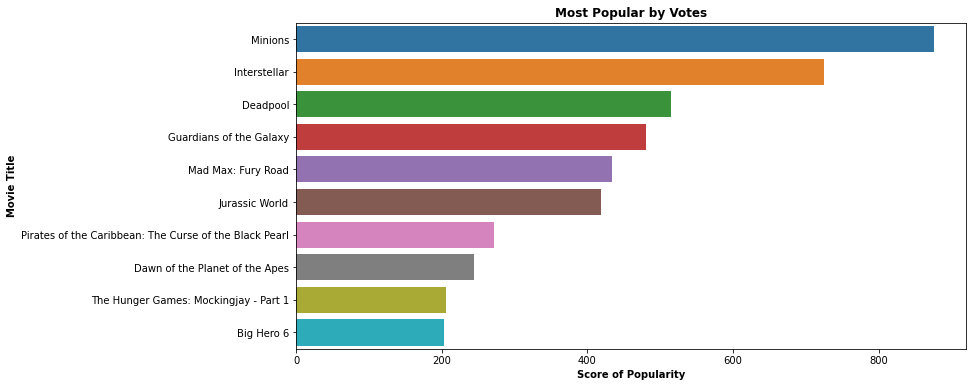

In [ ]:
popularity=merged_data1_ranking.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')

In [ ]:
#Scaling of weights and popularity

from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(merged_data1[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head()

,weighted_average,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [ ]:
merged_data1[['normalized_weighted_average','normalized_popularity']]=movie_normalized_df[['weighted_average','popularity']]
merged_data1.head()

,id,original_language,original_title,overview,popularity,vote_average,vote_count,weighted_average,normalized_weighted_average,normalized_popularity
0,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,7.148013,0.674339,0.171815
1,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500,6.807627,0.581403,0.158846
2,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,6.3,4466,6.276075,0.436273,0.122635
3,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,7.6,9106,7.509565,0.773054,0.128272
4,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,6.1,2124,6.098319,0.387739,0.050169


In [ ]:
#Take 50% from both popularity and weighted average
merged_data1['score'] = merged_data1['normalized_weighted_average'] * 0.5 + merged_data1['normalized_popularity'] * 0.5
movies_scored_df = merged_data1.sort_values(['score'], ascending=False)
movies_scored_df[['original_title', 'normalized_weighted_average', 'normalized_popularity', 'score']].head(20)

,original_title,normalized_weighted_average,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


Text(0, 0.5, 'Movie Title')

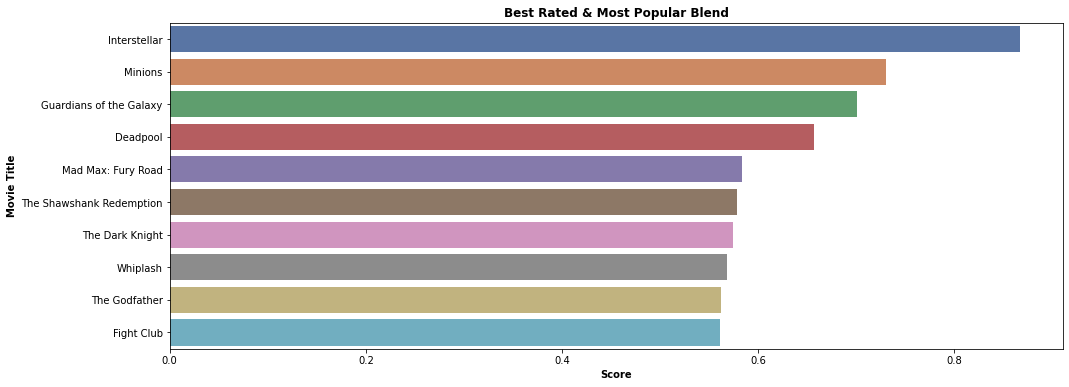

In [ ]:
plt.figure(figsize=(16,6))

ax = sns.barplot(x=movies_scored_df['score'].head(10), y=movies_scored_df['original_title'].head(10), data=movies_scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

**Now further can apply TF-IDF for content based recommendation on above modified dataset**

In [ ]:
movies_scored_df.head()['overview']

95     Interstellar chronicles the adventures of a gr...
546    Minions Stuart, Kevin and Bob are recruited by...
94     Light years from Earth, 26 years after being a...
788    Deadpool tells the origin story of former Spec...
127    An apocalyptic story set in the furthest reach...
Name: overview, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
movies_scored_df['overview'] = movies_scored_df['overview'].fillna('')

In [ ]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies_scored_df['overview'])

In [ ]:
tfv_matrix.shape

(4803, 10417)

In [ ]:
tfv_matrix.shape

(4803, 10417)

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [ ]:
sig[0]

array([0.76163447, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [ ]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_scored_df.index, index=movies_scored_df['original_title']).drop_duplicates()

In [ ]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_scored_df['original_title'].iloc[movie_indices]

In [ ]:
give_rec('Interstellar')

44                  Furious 7
3503             Lake of Fire
1347              A Man Apart
2411     The Best Man Holiday
3858              Dawn Patrol
4509             Love Letters
1153                     Lucy
2704             Catch a Fire
1343    Never Say Never Again
1553                    Se7en
Name: original_title, dtype: object

# **Movie Recommendation using Nearest Neighbor based Item based collaborative filtering**

In [ ]:
movies_df = pd.read_csv('https://raw.githubusercontent.com/AnkitNigam1985/Recommendation_complete_tutorial/master/KNN%20Movie%20Recommendation/movies.csv',
                        usecols=['movieId','title'],
                        dtype={'movieId': 'int32', 'title': 'str'})

In [ ]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
rating_df=pd.read_csv('https://raw.githubusercontent.com/AnkitNigam1985/Recommendation_complete_tutorial/master/KNN%20Movie%20Recommendation/ratings.csv',
                      usecols=['userId', 'movieId', 'rating'],
                      dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [ ]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
df = pd.merge(rating_df,movies_df,on='movieId')
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [ ]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])

In [ ]:
combine_movie_rating.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


Getting the total count of ratings for each movies

In [ ]:
movie_ratingCount = combine_movie_rating.groupby(by = ['title'])['rating'].count()
movie_ratingCount.head()

title
'71 (2014)                                 1
'Hellboy': The Seeds of Creation (2004)    1
'Round Midnight (1986)                     2
'Salem's Lot (2004)                        1
'Til There Was You (1997)                  2
Name: rating, dtype: int64

In [ ]:
movie_ratingCount=movie_ratingCount.reset_index()
movie_ratingCount.head()

,title,rating
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [ ]:
movie_ratingCount=movie_ratingCount.rename(columns = {'rating': 'totalRatingCount'})[['title', 'totalRatingCount']]
movie_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [ ]:
combine_movie_rating.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [ ]:
rating_with_totalRatingCount =combine_movie_rating.merge(movie_ratingCount, on='title', how='left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [ ]:
#Get all the movies where totalRatingCount>=100(threshold)
popularity_threshold = 100
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [ ]:
# Now lets create a Pivot matrix
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,569,570,571,572,573,574,575,577,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,4.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
Ace Ventura: Pet Detective (1994),0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,0.0,3.0,0.0,4.0,1.5,0.0,0.0,0.0,0.0,0.0,2.5,3.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,3.5,0.0,3.0
Aladdin (1992),0.0,0.0,0.0,4.0,4.0,5.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.5,3.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,...,4.0,0.0,0.0,0.0,4.5,5.0,0.0,0.0,0.0,2.0,0.0,0.0,3.5,4.0,0.0,4.5,0.0,0.0,0.0,4.0,0.0,5.0,3.5,4.5,0.0,0.0,4.0,0.0,3.0,3.5,0.0,0.0,0.0,3.0,3.5,0.0,0.0,3.0,0.0,0.0
Alien (1979),4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,4.0,4.0,0.0,1.5,0.0,4.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,3.5,2.0,4.0,4.5,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,4.0,0.0,4.0,5.0,0.0,5.0,2.5,0.0,0.0,5.0,0.0,0.0,4.0,3.0,4.0,0.0,4.5
Aliens (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,4.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,3.5,5.0,0.0,5.0,2.0,0.0,0.0,4.0,0.0,0.0,3.5,0.0,4.5,0.0,5.0


In [ ]:
#Create sparse matrix for the movie_features dataframe
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)

movie_features_df_matrix

<138x597 sparse matrix of type '<class 'numpy.float32'>'
	with 20188 stored elements in Compressed Sparse Row format>

In [ ]:
movie_features_df_matrix.toarray()

array([[0. , 0. , 0. , ..., 3. , 0. , 4.5],
       [0. , 0. , 0. , ..., 3.5, 0. , 3. ],
       [0. , 0. , 0. , ..., 3. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 3. , 3. , 0. ],
       [5. , 0. , 0. , ..., 3.5, 0. , 0. ],
       [5. , 0. , 0. , ..., 4. , 0. , 3.5]], dtype=float32)

In [ ]:
#Using NearestNeighbor model to find the similarity
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
#Get the random movie index from the pivot dataframe
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)

122


In [ ]:
movie_features_df.index[query_index]

'Terminator, The (1984)'

In [ ]:
#Get the similar movies in terms of distance for the given movie index
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [ ]:
distances

array([[2.9802322e-07, 3.0427641e-01, 3.3401740e-01, 3.4303945e-01,
        3.4405965e-01, 3.5694331e-01]], dtype=float32)

In [ ]:
distances.shape

(1, 6)

In [ ]:
distances.flatten()

array([2.9802322e-07, 3.0427641e-01, 3.3401740e-01, 3.4303945e-01,
       3.4405965e-01, 3.5694331e-01], dtype=float32)

In [ ]:
distances.shape

(1, 6)

In [ ]:
indices

array([[122, 121, 117,  71,   4,  38]])

In [ ]:
indices.flatten()

array([122, 121, 117,  71,   4,  38])

In [ ]:
#Traverse the distance matrix and print each movie
#The first index would be the input movie
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[indices.flatten()[i]]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Terminator, The (1984):

1: Terminator 2: Judgment Day (1991), with distance of 0.30427640676498413:
2: Star Wars: Episode V - The Empire Strikes Back (1980), with distance of 0.33401739597320557:
3: Indiana Jones and the Last Crusade (1989), with distance of 0.34303945302963257:
4: Aliens (1986), with distance of 0.34405964612960815:
5: Die Hard (1988), with distance of 0.3569433093070984:


# **Books recommendation on most rated books**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
books = pd.read_csv('/content/drive/My Drive/BooksDump/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [ ]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
books.head(2)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
users = pd.read_csv('/content/drive/My Drive/BooksDump/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")

In [ ]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [ ]:
users.columns = ['userID', 'Location', 'Age']
users.head(2)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [ ]:
ratings = pd.read_csv('/content/drive/My Drive/BooksDump/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")

In [ ]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [ ]:
ratings.columns = ['userID', 'ISBN', 'bookRating']
ratings.head(2)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5


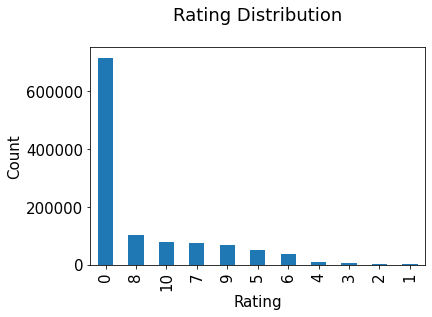

In [ ]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=True).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [ ]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


In [ ]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


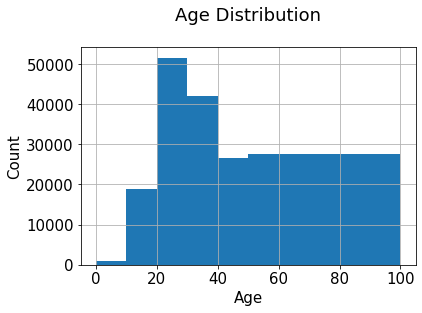

In [ ]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Recommendation based on rating count

In [ ]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating', ascending=False).head()

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [ ]:
indices=rating_count.sort_values('bookRating', ascending=False).head().index

In [ ]:
most_rated_books = pd.DataFrame(indices, index=np.arange(5), columns = ['ISBN'])
most_rated_books

,ISBN
0,0971880107
1,0316666343
2,0385504209
3,0060928336
4,0312195516


In [ ]:
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


# **Books recommendation based on correlation**

We use Pearsons’R correlation coefficient to measure the linear correlation between two variables, in our case, the ratings for two books.

First, we need to find out the average rating, and the number of ratings each book received.

In [ ]:
ratings = pd.read_csv('/content/drive/My Drive/BooksDump/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']
ratings.head(2)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5


In [ ]:
books = pd.read_csv('/content/drive/My Drive/BooksDump/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
books.head(2)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
users = pd.read_csv('/content/drive/My Drive/BooksDump/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
users.head(2)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [ ]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating.head()

,bookRating
ISBN,
0330299891,3.0
0375404120,1.5
0586045007,0.0
9022906116,3.5
9032803328,0.0


In [ ]:
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.head()

,bookRating,ratingCount
ISBN,,
0330299891,3.0,2
0375404120,1.5,2
0586045007,0.0,1
9022906116,3.5,2
9032803328,0.0,1


In [ ]:
average_rating=average_rating.sort_values('ratingCount', ascending=False)
average_rating.head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


Observations: In this data set, the book that received the most rating counts was not highly rated at all. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded

In [ ]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]

In [ ]:
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [ ]:
ratings.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [ ]:
ratings_pivot.shape

(905, 207699)

In [ ]:
books.head(2)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
def get_recom(ISBNval):
  ratings_pivot=pd.pivot(index='userID', columns='ISBN', values='bookRating', data=ratings)
  #ratings_pivot.head()
  init_rating=ratings_pivot[ISBNval]
  ratings_pivot=ratings_pivot.corrwith(init_rating).dropna()
  ratings_pivot_df=pd.DataFrame(ratings_pivot, columns=['Corr'])
  x=ratings_pivot_df.join(average_rating['ratingCount'])
  x=x.sort_values(by='Corr', ascending=False)
  x=x[x.ratingCount>=300].head(10)

  #print ("ISBN - ", x.index)

  return books[books.ISBN.isin(list(x.index))][['bookTitle','bookAuthor','yearOfPublication']]

In [ ]:
get_recom('0316666343')

,bookTitle,bookAuthor,yearOfPublication
408,The Lovely Bones: A Novel,Alice Sebold,2002
706,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998
1373,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999
1702,The Reader,Bernhard Schlink,1999
1863,1st to Die: A Novel,James Patterson,2002
2230,Fahrenheit 451,RAY BRADBURY,1987
2536,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990
2849,The Nanny Diaries: A Novel,Emma McLaughlin,2003
4578,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999
4824,The Pilot's Wife : A Novel,Anita Shreve,1999


# **Books Recommendation using Nearest Neighbor items based collobarive filtering**

In [ ]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [ ]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

In [ ]:
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [ ]:
book_ratingCount=combine_book_rating.groupby('bookTitle')['bookRating'].count()
book_ratingCount.head()

bookTitle
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    2
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                1
Name: bookRating, dtype: int64

In [ ]:
book_ratingCount_df=pd.DataFrame(book_ratingCount)
book_ratingCount_df.head()

,bookRating
bookTitle,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2
Always Have Popsicles,1
Apple Magic (The Collector's series),1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1


In [ ]:
book_ratingCount_df=book_ratingCount_df.reset_index()
book_ratingCount_df.head()

,bookTitle,bookRating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [ ]:
book_ratingCount_df.rename(columns={'bookRating': 'totalRatingCount'}, inplace=True)

In [ ]:
book_ratingCount_df.head(2)

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1


In [ ]:
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [ ]:
combine_book_rating.head()['bookTitle']

0    Politically Correct Bedtime Stories: Modern Ta...
1    Politically Correct Bedtime Stories: Modern Ta...
2    Politically Correct Bedtime Stories: Modern Ta...
3    Politically Correct Bedtime Stories: Modern Ta...
4    Politically Correct Bedtime Stories: Modern Ta...
Name: bookTitle, dtype: object

In [ ]:
book_ratingCount_df[book_ratingCount_df.bookTitle.isin(['Politically Correct Bedtime Stories: Modern Tales for Our Life and Times'])]['totalRatingCount']

92948    82
Name: totalRatingCount, dtype: int64

In [ ]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount_df, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount_df['totalRatingCount'].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [ ]:
book_ratingCount_df['totalRatingCount'].quantile(np.arange(.9, 1, .01))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64

In [ ]:
popularity_threshold = 100
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
199,277427,0060930535,0,The Poisonwood Bible: A Novel,133
200,254,0060930535,0,The Poisonwood Bible: A Novel,133
201,6251,0060930535,0,The Poisonwood Bible: A Novel,133
202,7346,0060930535,0,The Poisonwood Bible: A Novel,133
203,11676,0060930535,0,The Poisonwood Bible: A Novel,133


In [ ]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')
combined.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location,Age
0,277427,0060930535,0,The Poisonwood Bible: A Novel,133,"gilbert, arizona, usa",48.000
1,254,0060930535,0,The Poisonwood Bible: A Novel,133,"minneapolis, minnesota, usa",24.000
2,6251,0060930535,0,The Poisonwood Bible: A Novel,133,"wahiawa, hawaii, usa",32.000
3,7346,0060930535,0,The Poisonwood Bible: A Novel,133,"sunnyvale, california, usa",49.000
4,11676,0060930535,0,The Poisonwood Bible: A Novel,133,"n/a, n/a, n/a",nan


Filter users from USA/Canada

In [ ]:
us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,0060930535,0,The Poisonwood Bible: A Novel,133,"gilbert, arizona, usa"
1,254,0060930535,0,The Poisonwood Bible: A Novel,133,"minneapolis, minnesota, usa"
2,6251,0060930535,0,The Poisonwood Bible: A Novel,133,"wahiawa, hawaii, usa"
3,7346,0060930535,0,The Poisonwood Bible: A Novel,133,"sunnyvale, california, usa"
5,13273,0060930535,9,The Poisonwood Bible: A Novel,133,"harrisburg, pennsylvania, usa"


In [ ]:
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_pivot.head()

userID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,9856,10447,10819,11601,11993,12538,12824,13082,13273,13552,13850,14422,14521,15408,16106,16634,16795,16916,16966,...,260897,261829,262399,263163,263460,263877,264031,264082,264321,264637,265115,265313,265889,266056,266226,266753,266865,267635,268032,268110,268330,268622,268932,269566,269719,269890,270713,270820,271195,271284,271448,271705,273979,274061,274308,274808,275970,277427,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.000,0.000,0.000,...,0.000,8.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2nd Chance,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
A Bend in the Road,0.000,0.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,8.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),0.000,0.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
A Map of the World,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Implementing KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

#create sparse matrix which will be passed to NearestNeighbors
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
#Get the random book  index from the pivot dataframe
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)

43


In [ ]:
us_canada_user_rating_pivot.index[query_index]

'Harry Potter and the Order of the Phoenix (Book 5)'

In [ ]:
#Get the similar books in terms of distance for the given book index
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [ ]:
distances.flatten()
indices.flatten()

array([43, 42, 44, 41, 45, 91])

In [ ]:
distances

array([[1.11022302e-16, 4.07375360e-01, 5.07783680e-01, 6.40812970e-01,
        7.10052735e-01, 7.81934310e-01]])

In [ ]:
indices

array([[43, 42, 44, 41, 45, 91]])

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[indices.flatten()[i]]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Harry Potter and the Order of the Phoenix (Book 5):

1: Harry Potter and the Goblet of Fire (Book 4), with distance of 0.40737536009907627:
2: Harry Potter and the Prisoner of Azkaban (Book 3), with distance of 0.5077836803134383:
3: Harry Potter and the Chamber of Secrets (Book 2), with distance of 0.6408129701529381:
4: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)), with distance of 0.7100527352257471:
5: The Bonesetter's Daughter, with distance of 0.7819343099675472:


# **Class session - Movie Recommendation based on Content based filtering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
# Ignore the timestamp column
ratings = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Assignment/ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

# Reading users file
users = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Assignment/users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Assignment/movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [ ]:
ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [ ]:
users.head()

,user_id,gender,zipcode,age_desc,occ_desc
0,1,F,48067,Under 18,K-12 student
1,2,M,70072,56+,self-employed
2,3,M,55117,25-34,scientist
3,4,M,02460,45-49,executive/managerial
4,5,M,55455,25-34,writer


In [ ]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#Get the year out of movie title
#movies['year']=movies['title'].apply(lambda x:x[-5:-1])
movies['year'] = movies.title.str.extract(r'[a-zA-Z]*\((\d{4})\)').astype('int')
movies['title']=movies['title'].apply(lambda x:x[0:-7])

In [ ]:
movies.head()

,movie_id,title,genres,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [ ]:
# Using Year as recency effect on ratings
movies['recency'] = 2020-movies['year']
combined_with_mean_rating = pd.merge(left=movies, right=ratings.groupby('movie_id')['rating'].mean(),on='movie_id')
combined_with_mean_rating['recency_rating'] = combined_with_mean_rating['recency'] * combined_with_mean_rating['rating']
combined_with_mean_rating['recency_rating'].head()

combined_with_mean_rating.head()

,movie_id,title,genres,year,recency,rating,recency_rating
0,1,Toy Story,Animation|Children's|Comedy,1995,25,4.147,103.671
1,2,Jumanji,Adventure|Children's|Fantasy,1995,25,3.201,80.029
2,3,Grumpier Old Men,Comedy|Romance,1995,25,3.017,75.418
3,4,Waiting to Exhale,Comedy|Drama,1995,25,2.729,68.235
4,5,Father of the Bride Part II,Comedy,1995,25,3.007,75.169


In [ ]:
#Top movies that are watched by people who are less than 18 
movies[movies.movie_id.isin(list(ratings[ratings.user_id.isin(list(users[users.age_desc=='Under 18']['user_id']))]['movie_id']))]['title']

0                         Toy Story
1                           Jumanji
2                  Grumpier Old Men
3                 Waiting to Exhale
4       Father of the Bride Part II
                   ...             
3878               Meet the Parents
3879            Requiem for a Dream
3880                      Tigerland
3881               Two Family House
3882                 Contender, The
Name: title, Length: 2650, dtype: object

In [ ]:
users.groupby('age_desc')['user_id'].count()

age_desc
18-24       1103
25-34       2096
35-44       1193
45-49        550
50-55        496
56+          380
Under 18     222
Name: user_id, dtype: int64

In [ ]:
#What are top 10 moveis of all time?
#All those moveis with higest rating and max users have rated
combined_with_mean_rating.sort_values(by='rating', ascending=False)[:10]['title']

926     Schlafes Bruder (Brother of Sleep)
3635                     Bittersweet Motel
1652                      Follow the Bitch
3152                       Song of Freedom
744            Gate of Heavenly Peace, The
3054                             Baby, The
3367                     One Little Indian
3010                         Smashing Time
2955                      Ulysses (Ulisse)
3414                                 Lured
Name: title, dtype: object

In [ ]:
# Get summary statistics of rating
ratings['rating'].describe()

count   1000209.000
mean          3.582
std           1.117
min           1.000
25%           3.000
50%           4.000
75%           4.000
max           5.000
Name: rating, dtype: float64

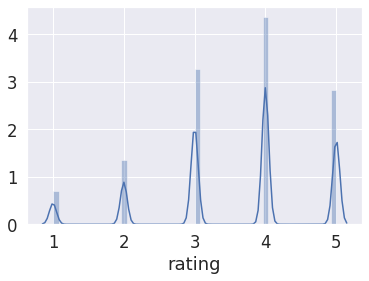

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

In [ ]:
dataset = pd.merge(pd.merge(movies, ratings),users)

In [ ]:
#profile a user by the hostory in terms of his consumption of movies 
cnt=ratings.user_id.value_counts()
#cnt[cnt>1].index
user_indices=users[users.user_id.isin(list(cnt[cnt>1].index))]['user_id']
movie_indices=ratings[ratings.user_id==6036]['movie_id']
movies[movies.movie_id.isin(list(movie_indices))][['title','genres','year']]

,title,genres,year
3,Waiting to Exhale,Comedy|Drama,1995
5,Heat,Action|Crime|Thriller,1995
10,"American President, The",Comedy|Drama|Romance,1995
15,Casino,Drama|Thriller,1995
16,Sense and Sensibility,Drama|Romance,1995
...,...,...,...
3482,Marathon Man,Thriller,1976
3503,Carnosaur,Horror|Sci-Fi,1993
3504,Carnosaur 2,Horror|Sci-Fi,1995
3505,Carnosaur 3: Primal Species,Horror|Sci-Fi,1996


IPywidgets

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

df = users.merge(ratings, on='user_id').merge(movies, on='movie_id').sort_values(by='rating', ascending=False)
cols = ['gender', 'rating', 'age_desc', 'occ_desc']
@interact
def getTopMoviesToWatch(column=cols, gender=df.gender.unique(), rating=(min(df.rating), max(df.rating)), age=df.age_desc.unique(), occupation=df.occ_desc.unique(), nMovies=10):
  colName = column
  colValue = rating
  if colName == 'gender':
    colValue = gender
  elif colName == 'rating':
    colValue = rating
  elif colName == 'age_desc':
    colValue = age
  elif colName == 'occ_desc':
    colValue = occupation
  
  print(f'Top {nMovies} Movie Titles of {colName} with {colValue}')
  print(df.loc[df[colName] == colValue, 'title'].value_counts()[:nMovies])
  print()
  return

interactive(children=(Dropdown(description='column', options=('gender', 'rating', 'age_desc', 'occ_desc'), val…

In [ ]:
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
0,Toy Story,Animation|Children's|Comedy,5
489283,American Beauty,Comedy|Drama,5
489259,Election,Comedy,5
489257,"Matrix, The",Action|Sci-Fi|Thriller,5
489256,Dead Ringers,Drama|Thriller,5
489237,Rushmore,Comedy,5
489236,"Simple Plan, A",Crime|Thriller,5
489226,Hands on a Hard Body,Documentary,5
489224,Pleasantville,Comedy,5
489212,Say Anything...,Comedy|Drama|Romance,5


In [ ]:
# Make a census of the genre keywords

genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [ ]:
movies['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False)

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Western          68
Fantasy          68
Film-Noir        44
dtype: int64

In [ ]:
# Function that counts the number of times each of the genre keywords appear

def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    
# convert the dictionary in a list to sort the keywords by frequency

    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count
                
    

In [ ]:
# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency

keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471]]

**Implementing content based model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1, 3),min_df=0) 
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(3883, 303)

In [ ]:
tf.get_feature_names()[0:20]

['action',
 'action adventure',
 'action adventure animation',
 'action adventure children',
 'action adventure comedy',
 'action adventure crime',
 'action adventure drama',
 'action adventure fantasy',
 'action adventure horror',
 'action adventure mystery',
 'action adventure romance',
 'action adventure sci',
 'action adventure thriller',
 'action adventure war',
 'action adventure western',
 'action animation',
 'action animation children',
 'action children',
 'action children fantasy',
 'action comedy']

In [ ]:
tfidf_matrix

<3883x303 sparse matrix of type '<class 'numpy.float64'>'
	with 10523 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(tfidf_matrix.toarray(),columns=tf.get_feature_names())

,action,action adventure,action adventure animation,action adventure children,action adventure comedy,action adventure crime,action adventure drama,action adventure fantasy,action adventure horror,action adventure mystery,action adventure romance,action adventure sci,action adventure thriller,action adventure war,action adventure western,action animation,action animation children,action children,action children fantasy,action comedy,action comedy crime,action comedy drama,action comedy fantasy,action comedy musical,action comedy romance,action comedy sci,action comedy war,action comedy western,action crime,action crime drama,action crime mystery,action crime romance,action crime sci,action crime thriller,action drama,action drama fantasy,action drama mystery,action drama romance,action drama sci,action drama thriller,...,horror thriller,musical,musical romance,musical romance war,musical sci,musical sci fi,musical war,mystery,mystery romance,mystery romance thriller,mystery sci,mystery sci fi,mystery thriller,noir,noir horror,noir mystery,noir mystery thriller,noir romance,noir romance thriller,noir sci,noir sci fi,noir thriller,romance,romance sci,romance sci fi,romance thriller,romance war,romance war western,romance western,sci,sci fi,sci fi thriller,sci fi war,sci fi western,thriller,thriller war,thriller western,war,war western,western
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.548,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

- Further we will be using the **Cosine Similarity** to calculate a numeric quantity that denotes the similarity between two movies. 
- Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score.
- Therefore, we will use sklearn's **linear_kernel** instead of cosine_similarities since it is much faster.

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.1000018 , 0.07437618, 0.08717643],
       [0.1000018 , 1.        , 0.        , 0.        ],
       [0.07437618, 0.        , 1.        , 0.1719888 ],
       [0.08717643, 0.        , 0.1719888 , 1.        ]])

In [ ]:
movies.head()

,movie_id,title,genres,year,recency
0,1,Toy Story,Animation|Children's|Comedy,1995,25
1,2,Jumanji,Adventure|Children's|Fantasy,1995,25
2,3,Grumpier Old Men,Comedy|Romance,1995,25
3,4,Waiting to Exhale,Comedy|Drama,1995,25
4,5,Father of the Bride Part II,Comedy,1995,25


In [ ]:
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

In [ ]:
titles

0                         Toy Story
1                           Jumanji
2                  Grumpier Old Men
3                 Waiting to Exhale
4       Father of the Bride Part II
                   ...             
3878               Meet the Parents
3879            Requiem for a Dream
3880                      Tigerland
3881               Two Family House
3882                 Contender, The
Name: title, Length: 3883, dtype: object

In [ ]:
indices

title
Toy Story                         0
Jumanji                           1
Grumpier Old Men                  2
Waiting to Exhale                 3
Father of the Bride Part II       4
                               ... 
Meet the Parents               3878
Requiem for a Dream            3879
Tigerland                      3880
Two Family House               3881
Contender, The                 3882
Length: 3883, dtype: int64

In [ ]:
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    print (sim_scores)
    print ("\n\n")
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
genre_recommendations('Good Will Hunting').head(10)

[(25, 1.0), (26, 1.0), (29, 1.0), (30, 1.0), (35, 1.0), (39, 1.0), (42, 1.0), (52, 1.0), (54, 1.0), (56, 1.0), (61, 1.0), (66, 1.0), (77, 1.0), (79, 1.0), (81, 1.0), (82, 1.0), (89, 1.0), (92, 1.0), (95, 1.0), (112, 1.0)]





25                                          Othello
26                                     Now and Then
29    Shanghai Triad (Yao a yao yao dao waipo qiao)
30                                  Dangerous Minds
35                                 Dead Man Walking
39                         Cry, the Beloved Country
42                                      Restoration
52                                         Lamerica
54                                          Georgia
56                            Home for the Holidays
Name: title, dtype: object

# **Class session - Movie Recommendation based on collaborative filtering using Pearson correlation coefficient**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
# Ignore the timestamp column
ratings = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Assignment/ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

# Reading users file
users = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Assignment/users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Assignment/movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [ ]:
# Fill NaN values in user_id and movie_id column with 0
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

In [ ]:
# Randomly sample 2% of the ratings dataset
small_data = ratings.sample(frac=0.02)

# Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 370514 to 210448
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   20004 non-null  int64
 1   movie_id  20004 non-null  int64
 2   rating    20004 non-null  int64
dtypes: int64(3)
memory usage: 625.1 KB
None


In [ ]:
from sklearn import model_selection as cv
train_data, test_data = cv.train_test_split(small_data, test_size=0.2)

In [ ]:
train_data.head(5)

,user_id,movie_id,rating
904075,5466,1080,5
105908,699,1804,3
149290,960,364,5
613142,3716,2278,5
892246,5389,2013,3


In [ ]:
train_data.head(5).T

,904075,105908,149290,613142,892246
user_id,5466,699,960,3716,5389
movie_id,1080,1804,364,2278,2013
rating,5,3,5,5,3


In [ ]:
test_data.head(5)

,user_id,movie_id,rating
634756,3829,2485,1
89797,591,1358,4
883126,5333,1967,4
243147,1466,750,5
894057,5397,480,3


In [ ]:
test_data.head(5).T

,634756,89797,883126,243147,894057
user_id,3829,591,5333,1466,5397
movie_id,2485,1358,1967,750,480
rating,1,4,4,5,3


In [ ]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = train_data[['user_id', 'movie_id', 'rating']].values
test_data_matrix = test_data[['user_id', 'movie_id', 'rating']].values

In [ ]:
# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(16003, 3)
(4001, 3)


Now, we use the **pairwise_distances** function from sklearn to calculate the [Pearson Correlation Coefficient](https://stackoverflow.com/questions/1838806/euclidean-distance-vs-pearson-correlation-vs-cosine-similarity). This method provides a safe way to take a distance matrix as input, while preserving compatibility with many other algorithms that take a vector array.

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(train_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[1.         0.0564817  0.98116266 0.8934172 ]
 [0.0564817  1.         0.24829277 0.49897248]
 [0.98116266 0.24829277 1.         0.96337098]
 [0.8934172  0.49897248 0.96337098 1.        ]]


In [ ]:
user_correlation[0][1:100]

array([ 0.0564817 ,  0.98116266,  0.8934172 ,  0.98175369,  0.98448766,
        0.96675202, -0.20613891,  0.99963703,  0.99730459, -0.32512689,
        0.95168257,  0.98855589,  0.61345338,  0.95202948, -0.13003032,
        0.58729284,  0.93163371,  0.78935409,  0.99381564,  0.96416522,
        0.85492587,  0.98552253,  0.17170582,  0.86563932,  0.52176904,
        0.98332622,  0.11437801,  0.55167935,  0.99997208,  0.89482976,
        0.88423214,  0.98495169,  0.99864918,  0.66959024, -0.17317457,
        0.28221135,  0.73306041,  0.03326734, -0.28604416, -0.30088499,
       -0.15124124,  0.94542099,  0.71563785,  0.48227536,  0.00126464,
        0.89848133,  0.53014999,  0.97927975,  0.54381883,  0.97891731,
        0.73104648,  0.98237167,  0.98606357,  0.87914897, -0.00892803,
        0.19292213,  0.9824976 ,  0.1202232 , -0.00467998,  0.97014349,
        0.9496235 ,  0.95370981,  0.99821763,  0.87832933,  0.99798036,
        0.99843658, -0.31657216,  0.93742814,  0.85152321,  0.99

In [ ]:
train_data_matrix.T

array([[5466,  699,  960, ...,  314, 2878, 1231],
       [1080, 1804,  364, ..., 1012,   26, 2908],
       [   5,    3,    5, ...,    4,    4,    4]])

In [ ]:
# Item Similarity Matrix
item_correlation = 1-pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.         -0.01977106  0.02040904]
 [-0.01977106  1.         -0.05936146]
 [ 0.02040904 -0.05936146  1.        ]]


- Using the similarity matrix, we can now predict the ratings that were not included with the data. 
- Using these predictions, we can then compare them with the test data to attempt to validate the quality of our recommender model.

For the user-user CF case, we will look at the similarity between 2 users (A and B, for example) as weights that are multiplied by the ratings of a similar user B (corrected for the average rating of that user). 
- We also need to normalize it so that the ratings stay between 1 and 5 and, as a final step, sum the average ratings for the user that we are trying to predict. 
- The idea here is that some users may tend always to give high or low ratings to all movies. 
- The relative difference in the ratings that these users give is more important than the absolute values. 

In [ ]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
train_data_matrix[0]

array([5466, 1080,    5])

In [ ]:
train_data_matrix.mean(axis=1)[0]

2183.6666666666665

In [ ]:
mean_user_rating = train_data_matrix.mean(axis=1)

In [ ]:
ratings_diff = train_data_matrix - mean_user_rating[:, np.newaxis]

In [ ]:
ratings_diff

array([[ 3282.33333333, -1103.66666667, -2178.66666667],
       [ -136.33333333,   968.66666667,  -832.33333333],
       [  517.        ,   -79.        ,  -438.        ],
       ...,
       [ -129.33333333,   568.66666667,  -439.33333333],
       [ 1908.66666667,  -943.33333333,  -965.33333333],
       [ -150.        ,  1527.        , -1377.        ]])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [ ]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 1432.75343146396
Item-based CF RMSE: 1649.9386990878174


In [ ]:
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

User-based CF RMSE: 695.6530129488168
Item-based CF RMSE: 162.2316704662861


# **Class session - Movie Recommnedation based on collaborative filtering using Nearest Neighbor model**

In [ ]:
Ratings = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
Ratings.head()

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,4.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(Ratings)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
query_index = np.random.choice(Ratings.shape[0])
distances, indices = model_knn.kneighbors(Ratings.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendation for {0}:\n'.format(Ratings.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, Ratings.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendation for 4691:

1: 5785, with distance of 0.7059986594091665:
2: 5561, with distance of 0.7223749185510415:
3: 4217, with distance of 0.7226364348754586:
4: 3125, with distance of 0.7231179792192871:
5: 918, with distance of 0.7233112368481378:


# **CLass session - Using SVD for Recommendation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
# Ignore the timestamp column
ratings = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Assignment/ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])


# Reading movies file
movies = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Assignment/movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [ ]:
ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [ ]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
n_users = ratings.user_id.unique().shape[0]
n_movies = ratings.movie_id.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 6040 | Number of movies = 3706


In [ ]:
Ratings = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
Ratings.head()

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,4.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We need to de-normalize the data (normalize by each users mean) and convert it from a dataframe to a numpy array.

In [ ]:
R = Ratings.values
user_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1) # vectorized operation 

In [ ]:
Ratings_demeaned

array([[ 4.94009714, -0.05990286, -0.05990286, ..., -0.05990286,
        -0.05990286, -0.05990286],
       [-0.12924987, -0.12924987, -0.12924987, ..., -0.12924987,
        -0.12924987, -0.12924987],
       [-0.05369671, -0.05369671, -0.05369671, ..., -0.05369671,
        -0.05369671, -0.05369671],
       ...,
       [-0.02050729, -0.02050729, -0.02050729, ..., -0.02050729,
        -0.02050729, -0.02050729],
       [-0.1287102 , -0.1287102 , -0.1287102 , ..., -0.1287102 ,
        -0.1287102 , -0.1287102 ],
       [ 2.6708041 , -0.3291959 , -0.3291959 , ..., -0.3291959 ,
        -0.3291959 , -0.3291959 ]])

Creating SVD

In [ ]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50) # create a facotrization keeeping 50 features in mind 

In [ ]:
Ratings_demeaned.shape

(6040, 3706)

In [ ]:
U.shape

(6040, 50)

In [ ]:
sigma.shape

(50,)

In [ ]:
Vt.shape

(50, 3706)

In [ ]:
sigma = np.diag(sigma)

In [ ]:
sigma.shape

(50, 50)

Making Recommendations using SVD

Now, we have everything we need to make movie ratings predictions for every user. We can do it all at once by following the math and matrix multiply $U$, $\Sigma$, and $V^{T}$ back to get the rank $k=50$ approximation of $A$.

But first, we need to add the user means back to get the actual star ratings prediction.

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [ ]:
all_user_predicted_ratings.shape

(6040, 3706)

In [ ]:
all_user_predicted_ratings

array([[ 4.28886061,  0.14305516, -0.1950795 , ...,  0.03191195,
         0.05044975,  0.08891033],
       [ 0.74471587,  0.16965927,  0.33541808, ..., -0.10110207,
        -0.0540982 , -0.14018846],
       [ 1.81882382,  0.45613623,  0.09097801, ...,  0.01234452,
         0.01514752, -0.10995596],
       ...,
       [ 0.61908871, -0.16176859,  0.10673806, ..., -0.01336948,
        -0.0303543 , -0.11493552],
       [ 1.50360483, -0.03620761, -0.16126817, ..., -0.01090407,
        -0.03864749, -0.16835943],
       [ 1.99624816, -0.18598715, -0.1564782 , ..., -0.00664061,
         0.12706713,  0.28500112]])

In [ ]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,0.512867,-0.089172,0.310181,-0.002005,-0.052401,-0.189827,0.238360,0.006466,-0.099315,-0.069682,-0.321492,0.111577,0.034795,0.320576,-0.118217,-0.012647,0.065573,-0.098318,0.064081,-0.005914,0.091936,0.180563,-0.009566,2.641693,-0.012495,0.765179,0.019784,0.002917,0.053079,0.014856,...,0.018810,-0.018782,0.022249,0.227852,-0.067653,-0.046039,-0.023574,-0.019405,-0.005116,-0.032921,-0.008259,-0.019157,0.007527,-0.008687,-0.025630,-0.013563,0.015240,-0.044665,-0.009568,-0.043549,-0.003131,-0.008221,-0.005948,0.031885,-0.003424,-0.001159,-0.002124,-0.002827,0.010393,-0.001068,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,0.772656,0.046179,-0.054562,0.042344,0.048390,0.347313,1.074905,-0.099782,0.008163,0.250869,2.186638,0.018789,-0.002199,0.218934,0.824475,0.139274,-0.007135,0.053071,-0.156952,0.044739,-0.002960,0.453298,-0.007484,0.920325,0.016566,1.335129,-0.015066,-0.045602,0.034649,0.122010,...,-0.042363,-0.137822,-0.112071,0.380783,-0.036273,-0.016174,0.002920,-0.148021,-0.017614,-0.033474,0.086133,0.008153,-0.126819,0.109208,0.001798,0.151866,0.014118,0.032897,0.005764,0.042259,0.022404,0.003260,0.010556,0.137181,-0.042184,0.006759,-0.005789,0.000340,0.002024,0.016013,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,-0.023476,0.034796,0.065942,0.008661,0.110348,-0.002952,-0.122061,0.063974,0.061033,0.081799,0.329471,0.149579,0.095352,-0.161493,0.022545,-0.009284,-0.002677,-0.142710,0.012345,-0.085331,0.076139,-0.355795,-0.008579,1.046871,-0.088946,0.383583,-0.018144,-0.038618,0.113984,0.006942,...,0.007233,-0.047221,0.066474,-0.179455,0.097428,0.034113,0.008098,-0.024784,-0.012749,-0.007394,-0.017220,0.004719,0.113348,-0.074943,-0.145795,0.128619,0.112567,0.045500,-0.018027,-0.058946,-0.002770,-0.035276,-0.008085,0.132182,-0.017005,0.014383,0.006598,-0.006217,-0.000342,0.000518,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956
3,0.408057,-0.072960,0.039642,0.089363,0.041950,0.237753,-0.049426,0.009467,0.045469,-0.111370,-0.375831,0.068658,0.011199,0.069699,-0.037529,-0.238788,0.060607,-0.043418,0.053152,0.078237,0.357185,-0.096005,-0.028243,-0.067169,0.246164,-0.020379,0.034461,-0.022225,-0.012327,0.009182,0.014730,0.215893,-0.019687,-0.293933,-0.011511,0.145326,-0.029213,0.030029,-0.045409,-0.030684,...,-0.015077,-0.030208,0.028357,-0.072643,-0.135727,-0.053318,-0.012962,-0.054465,0.005870,-0.018048,-0.006836,-0.008222,-0.027214,-0.071677,-0.094072,-0.010745,-0.103191,-0.031297,-0.023920,-0.015053,-0.017914,-0.029561,-0.024299,-0.057678,-0.111450,-0.015473,-0.007123,-0.007416,-0.011508,-0.010038,0.008571,-0.005425,-0.008500,-0.003417,-0.083982,0.094512,0.057557,-0.026050,0.014841,-0.034224
4,1.574272,0.021239,-0.051300,0.246884,-0.032406,1.552281,-0.199630,-0.014920,-0.060498,0.450512,-0.251178,0.012337,-0.084051,0.258937,0.016570,0.980536,1.267869,0.275619,-0.008139,-0.038832,1.849627,0.107649,-0.168424,0.386541,1.790343,0.192379,-0.054356,0.267566,1.027817,0.374665,-0.010445,1.947980,0.017468,2.784035,0.274397,1.422393,0.040553,0.022926,1.345800,0.104507,...,0.075475,0.330767,0.150470,-0.261636,0.085163,-0.014229,-0.029247,0.124172,0.092875,0.061895,0.034757,0.054386,0.047055,0.048403,0.082926,0.129035,-0.174646,0.102727,0.024732,0.047280,0.017818,0.041451,0.041595,-0.007138,-0.080448,0.0

In [ ]:
#top 5 values and their movie ID's
movies[movies.movie_id.isin(list(preds.iloc[0,:].nlargest(5).index))]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
523,527,Schindler's List (1993),Drama|War
591,595,Beauty and the Beast (1991),Animation|Children's|Musical
2286,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy
3045,3114,Toy Story 2 (1999),Animation|Children's|Comedy


Now, we write a function to return the movies with the highest predicted rating that the specified user hasn't already rated. Though we didn't use any explicit movie content features (such as genre or title), we'll merge in that information to get a more complete picture of the recommendations.

In [ ]:
userID=3
user_row_number = userID - 1 # User ID starts at 1, not 0
sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False)
sorted_user_predictions

movie_id
1198    4.382961
1197    4.124136
260     3.703313
1196    3.658492
1210    3.242291
          ...   
858    -0.609292
2662   -0.664298
1301   -0.686389
1221   -0.721101
1253   -0.721257
Name: 2, Length: 3706, dtype: float64

In [ ]:
user_data = ratings[ratings.user_id == (userID)]
user_data

,user_id,movie_id,rating
182,3,3421,4
183,3,1641,2
184,3,648,3
185,3,1394,4
186,3,3534,3
187,3,104,4
188,3,2735,4
189,3,1210,4
190,3,1431,3
191,3,3868,3


In [ ]:
user_full = (user_data.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id').
                     sort_values(['rating'], ascending=False)
                 )
user_full

,user_id,movie_id,rating,title,genres
38,3,1304,5,Butch Cassidy and the Sundance Kid (1969),Action|Comedy|Western
12,3,1615,5,"Edge, The (1997)",Adventure|Thriller
31,3,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy
32,3,1197,5,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance
33,3,1198,5,Raiders of the Lost Ark (1981),Action|Adventure
19,3,260,5,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
34,3,1378,5,Young Guns (1988),Action|Comedy|Western
16,3,2167,5,Blade (1998),Action|Adventure|Horror
37,3,3552,5,Caddyshack (1980),Comedy
14,3,1259,5,Stand by Me (1986),Adventure|Comedy|Drama


In [ ]:
movies[~movies['movie_id'].isin(user_full['movie_id'])]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
num_recommendations = 20
recommendations = (movies[~movies['movie_id'].isin(user_full['movie_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movie_id',
               right_on = 'movie_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )
recommendations

,movie_id,title,genres
2807,2918,Ferris Bueller's Day Off (1986),Comedy
2682,2791,Airplane! (1980),Comedy
2520,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Fantasy|Sci-Fi
898,919,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical
0,1,Toy Story (1995),Animation|Children's|Comedy
2695,2804,"Christmas Story, A (1983)",Comedy|Drama
107,110,Braveheart (1995),Action|Drama|War
2608,2716,Ghostbusters (1984),Comedy|Horror
1264,1307,When Harry Met Sally... (1989),Comedy|Romance
2290,2396,Shakespeare in Love (1998),Comedy|Romance


In [ ]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.user_id == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movie_id'].isin(user_full['movie_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movie_id',
               right_on = 'movie_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

Let's try to recommend 20 movies for user with ID 1310.

In [ ]:
already_rated, predictions = recommend_movies(preds, 1310, movies, ratings, 20)

User 1310 has already rated 24 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [ ]:
already_rated.head(10)

,user_id,movie_id,rating,title,genres
5,1310,2248,5,Say Anything... (1989),Comedy|Drama|Romance
6,1310,2620,5,This Is My Father (1998),Drama|Romance
7,1310,3683,5,Blood Simple (1984),Drama|Film-Noir
15,1310,1704,5,Good Will Hunting (1997),Drama
1,1310,1293,5,Gandhi (1982),Drama
12,1310,3101,4,Fatal Attraction (1987),Thriller
11,1310,1343,4,Cape Fear (1991),Thriller
20,1310,2000,4,Lethal Weapon (1987),Action|Comedy|Crime|Drama
18,1310,3526,4,Parenthood (1989),Comedy|Drama
17,1310,3360,4,Hoosiers (1986),Drama


In [ ]:
predictions

,movie_id,title,genres
1618,1674,Witness (1985),Drama|Romance|Thriller
1880,1961,Rain Man (1988),Drama
1187,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
1216,1242,Glory (1989),Action|Drama|War
1202,1225,Amadeus (1984),Drama
1273,1302,Field of Dreams (1989),Drama
1220,1246,Dead Poets Society (1989),Drama
1881,1962,Driving Miss Daisy (1989),Drama
1877,1957,Chariots of Fire (1981),Drama
1938,2020,Dangerous Liaisons (1988),Drama|Romance


# **Class session  - Recommendation using surprise library**

In [ ]:
!pip install surprise

     |████████████████████████████████| 6.5MB 3.3MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1675717 sha256=54d9c9c28a554575f3f1c0423f45de56a02bb7661e3d7d86a14db0a098aa7eb3
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset, SVD

In [ ]:
# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

# Split the dataset for 5-fold evaluation
# data.split(n_folds=5)

In [ ]:
data

In [ ]:
# from sklearn import model_selection
from surprise.model_selection import cross_validate

In [ ]:
# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm.
cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8733  0.8766  0.8741  0.8721  0.8737  0.8740  0.0015  
Fit time          51.61   51.96   51.59   52.23   51.54   51.78   0.27    
Test time         2.75    2.64    2.36    2.60    2.66    2.60    0.13    


{'fit_time': (51.60591673851013,
  51.95856070518494,
  51.58796191215515,
  52.23322033882141,
  51.53614544868469),
 'test_rmse': array([0.87326424, 0.8766094 , 0.87413945, 0.87212897, 0.87373894]),
 'test_time': (2.7510764598846436,
  2.6429803371429443,
  2.356379270553589,
  2.6010794639587402,
  2.6588451862335205)}

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
ratings[ratings['user_id'] == 1310][:5]

,user_id,movie_id,rating
215928,1310,2988,3
215929,1310,1293,5
215930,1310,1295,2
215931,1310,1299,4
215932,1310,2243,4


In [ ]:
svd.predict(1310, 2988)

Prediction(uid=1310, iid=2988, r_ui=None, est=3.515940926802918, details={'was_impossible': False})

# **Class Session  -  using surprise library with Book data set**

In [ ]:
import pandas as pd
user = pd.read_csv('/content/drive/My Drive/BooksDump/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
user.columns = ['userID', 'Location', 'Age']
rating = pd.read_csv('/content/drive/My Drive/BooksDump/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
rating.columns = ['userID', 'ISBN', 'bookRating']
df = pd.merge(user, rating, on='userID', how='inner')
df.drop(['Location', 'Age'], axis=1, inplace=True)
df.head()

,userID,ISBN,bookRating
0,2,0195153448,0
1,7,034542252,0
2,8,0002005018,5
3,8,0060973129,0
4,8,0374157065,0


In [ ]:
min_book_ratings = 50
filter_books = df['ISBN'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 50
filter_users = df['userID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df[(df['ISBN'].isin(filter_books)) & (df['userID'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(1149780, 3)
The new data frame shape:	(140516, 3)


In [ ]:
# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD,SVDpp,SlopeOne,NMF,NormalPredictor,KNNBaseline,KNNBasic,KNNWithMeans,KNNWithZScore,BaselineOnly,CoClustering#, evaluate
from surprise.model_selection import cross_validate
# Load Reader library
reader = Reader()
reader = Reader(rating_scale=(0, 9))

data = Dataset.load_from_df(df_new[['userID', 'ISBN', 'bookRating']], reader)

In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,3.377964,0.402241,0.605962
CoClustering,3.469620,2.477942,0.513110
SlopeOne,3.476062,0.847479,4.964211
KNNWithMeans,3.486605,0.898030,6.099913
KNNBaseline,3.501581,1.213816,6.990620
KNNWithZScore,3.509988,1.004541,6.369370
SVD,3.548952,5.806831,0.493242
KNNBasic,3.728064,0.775571,5.585464
SVDpp,3.782495,122.925509,6.235004


In [ ]:
from sklearn.model_selection import train_test_split
# trainset, testset = train_test_split(data, test_size=0.25)
trainset = data.build_full_trainset()
# testset = data.b
algo = BaselineOnly()
model = algo.fit(trainset)
predictions = model.test(trainset)
accuracy.rmse(predictions)

Estimating biases using als...


TypeError: ignored

In [ ]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [ ]:
best_predictions

NameError: ignored

In [ ]:
worst_predictions